KNN - predict whether a personwill have diabetes or not

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


In [7]:
dataset=pd.read_csv(r"C:\Users\KIIT0001\Downloads\diabetes.csv")
print(len(dataset))
print(dataset.head())

768
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [9]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN,mean)



In [10]:
print(dataset['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [11]:
#split dataset
x=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [14]:
#feature scalping
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [18]:
#define the model: Init k-nn
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(
    algorithm='auto',
    leaf_size=30,
    metric='euclidean',
    metric_params=None,
    n_jobs=1,
    n_neighbors=11,
    p=2,
    weights='uniform'
)


KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=11)

In [20]:
#predict the test set result
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [21]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test,y_pred))

[[94 13]
 [15 32]]
0.6956521739130435


In [2]:
import numpy as np

# Example dataset
X = np.array([
    [3,8],
    [4,5],
    [5,7],
    [6,3],
    [2,1],
])

y = np.array([-3.7,3.5,2.5,11.5,5.7])

X_b = np.c_[np.ones((len(X), 1)), X]

# Normal Equation: θ = (XᵀX)^(-1) Xᵀy
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Intercept:", theta[0])
print("Coefficients:", theta[1:])

# Prediction
new_value = np.array([1, 3, 2])  
prediction = new_value.dot(theta)

print("Predicted value:", prediction)


Intercept: 2.7995611285266486
Coefficients: [ 2.28163009 -1.67210031]
Predicted value: 6.3002507836990596


In [3]:
import numpy as np

# Example dataset
X = np.array([
    [60,22],
    [62,25],
    [67,24],
    [70,20],
    [71,15],
    [72,14],
    [75,14],
    [78,11],
    
])

y = np.array([140,155,159,179,192,200,212,215])

X_b = np.c_[np.ones((len(X), 1)), X]

# Normal Equation: θ = (XᵀX)^(-1) Xᵀy
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Intercept:", theta[0])
print("Coefficients:", theta[1:])

# Prediction
new_value = np.array([1, 80,24])  
prediction = new_value.dot(theta)

print("Predicted value:", prediction)

Intercept: -6.86748724769177
Coefficients: [ 3.1478931  -1.65614327]
Predicted value: 205.21652251052245


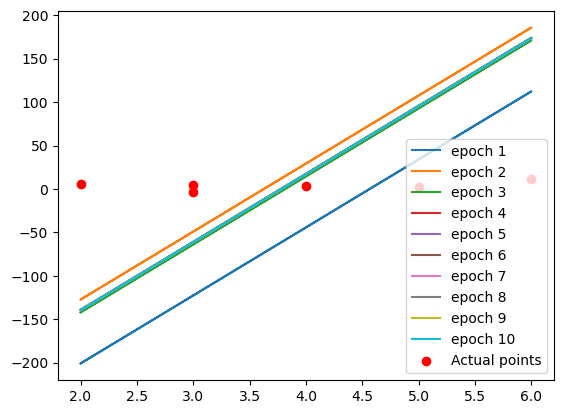

In [3]:
#gradient descent
import numpy as np
import matplotlib.pyplot as plt

X = np.array([3, 4, 5, 6, 2, 3])
y = np.array([-3.7, 3.5, 2.5, 11.5, 5.7, 4.0])

b = 10
m = 78.35
lr = 0.1
epochs = 10

for i in range(epochs):
    # compute gradient
    loss_slope = -2 * np.sum(y - (m * X + b))

    # update b
    b = b - (lr * loss_slope)

    # prediction
    y_pred = m * X + b

    # plot the line each epoch
    plt.plot(X, y_pred, label=f"epoch {i+1}")

# scatter actual data
plt.scatter(X, y, color='red', label="Actual points")
plt.legend()
plt.show()



In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np


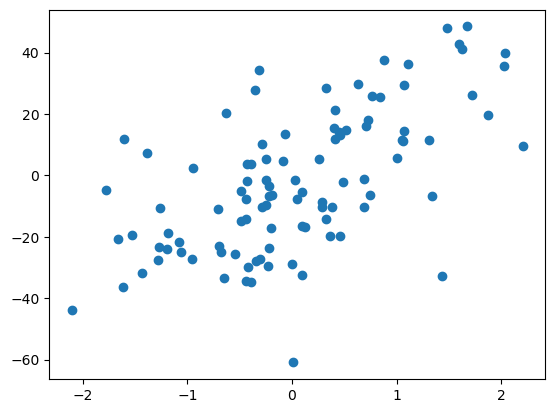

In [7]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)
plt.scatter(X,y)


In [13]:
#creating your own class and method
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()


In [10]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[15.01010547]
-2.7387679866222774


In [12]:
m=15.01

In [20]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=15.0101
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope=-2*np.sum(y-self.m*X.ravel()-self.b)
            self.b=self.b-(self.lr*loss_slope)
            print(loss_slope,self,b)
            
        print(self.b)
        

In [22]:
gd=GDRegressor(0.001,100)
gd.fit(X,y)

-23452.246446243134 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-18761.797156994504 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-15009.437725595606 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-12007.550180476484 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-9606.040144381192 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-7684.832115504952 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-6147.8656924039615 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-4918.292553923168 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-3934.634043138534 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-3147.707234510827 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-2518.1657876086624 <__main__.GDRegressor object at 0x0000018B104A3680> -296.42496862208
-2014.5326300869297 <__mai

In [10]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [3]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

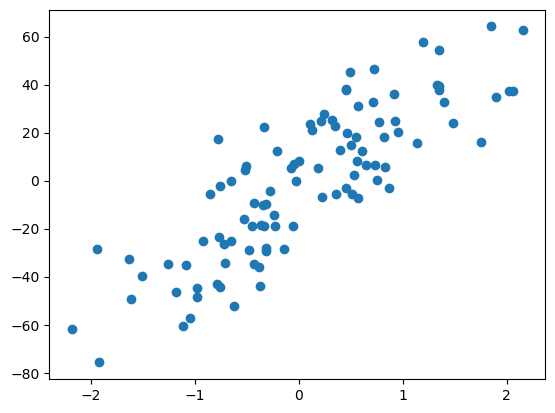

In [4]:
plt.scatter(X,y)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()

In [29]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)


[28.12597332]
-2.2710144261783816


In [31]:
#np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

In [33]:
import numpy as np
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
         for i in range(self.epochs):
             loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
             loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
             self.b=self.b-(self.lr*loss_slope_b)
             self.m=self.m-(self.lr*loss_slope_m)

         print(self.m,self.b)
    def predict(self,X):
         return self.m *X +self.b
    

gd=GDRegressor(0.001,50)
gd.fit(X_train,y_train)




    

28.159367347119066 -2.3004574196824854


In [34]:
gd.predict(X)

array([[-22.36092777],
       [-14.61020252],
       [-15.07783741],
       [ 24.53064978],
       [  4.39746882],
       [ 21.95071003],
       [ -9.15237073],
       [  2.90750354],
       [-22.60335208],
       [-14.40608727],
       [ 54.44688608],
       [  8.88560702],
       [  3.55106062],
       [ -8.84542293],
       [-23.94450805],
       [ 10.46020244],
       [ 15.71827044],
       [  7.82374456],
       [-47.78087586],
       [ 46.95708473],
       [-24.51788921],
       [-16.71707058],
       [-28.44179006],
       [ 58.2529665 ],
       [ -8.13929374],
       [-48.4562909 ],
       [-11.83573323],
       [-11.37125581],
       [-15.85557195],
       [-17.03243073],
       [ 18.02962184],
       [ 19.26711317],
       [ 10.46928178],
       [-37.82648268],
       [-63.88823983],
       [-35.68110113],
       [  3.82284374],
       [ 35.16042552],
       [-32.91480321],
       [ 13.53247651],
       [-44.90121876],
       [ -2.36773087],
       [-10.13254944],
       [ 10

In [36]:
y_pred=gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579